In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
deposite=pd.read_excel("Analytics Position Case Study.xlsx",sheet_name='Deposit Data',skiprows=3)
withdrawaldata=pd.read_excel("Analytics Position Case Study.xlsx",sheet_name='Withdrawal Data',skiprows=3)
gameplay=pd.read_excel("Analytics Position Case Study.xlsx",sheet_name='User Gameplay data',skiprows=3)

DATASET INFORMATION

In [25]:
deposite.head()

,User Id,Datetime,Amount
0,357,2022-01-10 00:03:00,2000
1,776,2022-01-10 00:03:00,2500
2,492,2022-01-10 00:06:00,5000
3,803,2022-01-10 00:07:00,5000
4,875,2022-01-10 00:09:00,1500


In [26]:
withdrawaldata.head()

,User Id,Datetime,Amount
0,190,2022-01-10 00:03:00,5872
1,159,2022-01-10 00:16:00,9540
2,164,2022-01-10 00:24:00,815
3,946,2022-01-10 00:29:00,23000
4,763,2022-01-10 00:40:00,9473


In [133]:
gameplay.head()

,UserID,gamesplayed,Datetime
0,851,1,2022-01-10 00:03:00
1,717,1,2022-01-10 00:03:00
2,456,1,2022-01-10 00:06:00
3,424,1,2022-01-10 00:07:00
4,845,1,2022-01-10 00:09:00
...,...,...,...
997,504,1,2022-02-10 16:16:00
998,449,1,2022-02-10 16:16:00
999,633,1,2022-02-10 16:18:00
1000,377,1,2022-02-10 16:21:00


In [31]:
deposite.shape

(17438, 3)

In [32]:
withdrawaldata.shape

(3566, 3)

In [33]:
gameplay.shape

(355266, 3)

DATA CLEANING

In [34]:
# check for missing values
print(deposite.isnull().sum())
print(gameplay.isnull().sum())
print(withdrawaldata.isnull().sum())

User Id     0
Datetime    0
Amount      0
dtype: int64
User ID         0
Games Played    0
Datetime        0
dtype: int64
User Id     0
Datetime    0
Amount      0
dtype: int64


There is no missing values in the dataset.

In [36]:
# check for data types
print(deposite.dtypes)
print(gameplay.dtypes)
print(withdrawaldata.dtypes)

User Id      int64
Datetime    object
Amount       int64
dtype: object
User ID          int64
Games Played     int64
Datetime        object
dtype: object
User Id      int64
Datetime    object
Amount       int64
dtype: object


In [112]:
deposite['Datetime']=pd.to_datetime(deposite['Datetime'])
gameplay['Datetime']=pd.to_datetime(gameplay['Datetime'])
withdrawaldata['Datetime']=pd.to_datetime(withdrawaldata['Datetime'])

It is important step to convert datetime into pandas datetime for extraction.

In [38]:
# check the duplicate
print(deposite.duplicated().sum())
print(gameplay.duplicated().sum())
print(withdrawaldata.duplicated().sum())

1
336861
1


In [44]:
deposite=deposite.drop_duplicates()
withdrawaldata=withdrawaldata.drop_duplicates()
gameplay=gameplay.drop_duplicates()

In [45]:
print("deposite shape:",deposite.shape)
print("withdrawaldata",withdrawaldata.shape)
print("gameplay shape",gameplay.shape)

deposite shape: (17437, 3)
withdrawaldata (3565, 3)
gameplay shape (18405, 3)


There is 3 dataset in 2 dataset have the 1 duplicate values but gameplay have maximumnumber duplicate value . Also I remove the duplicate beacuse of better data quality.

In [64]:
# check for negative or invalid values
print(deposite[deposite['Amount'] <= 0])
print(withdrawaldata[withdrawaldata['Amount']<=0])

Empty DataFrame
Columns: [User Id, Datetime, Amount]
Index: []
Empty DataFrame
Columns: [User Id, Datetime, Amount]
Index: []


There is no invalid values are there 

In [93]:
# rename the column
deposite.rename(columns={'User Id':'UserID','Amount':'DepositAmount'},inplace=True)
withdrawaldata.rename(columns={'User Id':'UserID','Amount':'WithdrawalAmount'},inplace=True)
gameplay.rename(columns={'User ID':'UserID','Games Played':'gamesplayed'},inplace=True)

In [94]:
gameplay.head()

,UserID,gamesplayed,Datetime
0,851,1,2022-01-10 00:03:00
1,717,1,2022-01-10 00:03:00
2,456,1,2022-01-10 00:06:00
3,424,1,2022-01-10 00:07:00
4,845,1,2022-01-10 00:09:00


In [141]:
# aggreagation of all data set and combine all them
deposite_agg=deposite.groupby('UserID').agg(
    Total_deposite=('DepositAmount','sum'),
    deposite_Count=('DepositAmount','count')
).reset_index()
withdrawaldata_agg=withdrawaldata.groupby('UserID').agg(
    Total_deposite=('WithdrawalAmount','sum'),
    deposite_Count=('WithdrawalAmount','count')
).reset_index()
gameplay_agg=gameplay.groupby('UserID').agg(
    Total_games=('gamesplayed','sum')
     
).reset_index()

In [135]:
# add a loyality point column for calculate loyality point
gameplay['loyality_point']=gameplay['gamesplayed']*10

C:\Users\ANMOL\AppData\Local\Temp\ipykernel_13012\3783127672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gameplay['loyality_point']=gameplay['gamesplayed']*10


In [137]:
gameplay.head()

,UserID,gamesplayed,Datetime,loyality_point
0,851,1,2022-01-10 00:03:00,10
1,717,1,2022-01-10 00:03:00,10
2,456,1,2022-01-10 00:06:00,10
3,424,1,2022-01-10 00:07:00,10
4,845,1,2022-01-10 00:09:00,10


In [136]:
merged_df.head(700)

,UserID,Total_deposite,deposite_Count,Total_withdrawal,withdrawal_Count,Total_games,Max_Diff,loyalty_point,Datetime
0,1,5000.0,1.0,0.0,0.0,2,1.0,50.401,2022-05-10 23:12:00
1,1,5000.0,1.0,0.0,0.0,2,1.0,50.401,NaT
2,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-01-10 19:34:00
3,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-02-10 07:55:00
4,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-19 04:49:00
...,...,...,...,...,...,...,...,...,...
695,39,134500.0,44.0,151320.0,8.0,224,36.0,2146.436,2022-09-10 19:32:00
696,39,134500.0,44.0,151320.0,8.0,224,36.0,2146.436,2022-09-10 23:05:00
697,39,134500.0,44.0,151320.0,8.0,224,36.0,2146.436,2022-10-10 03:29:00
698,39,134500.0,44.0,151320.0,8.0,224,36.0,2146.436,2022-10-10 08:12:00


In [107]:

merged_df['Max_Diff']=(merged_df['deposite_Count']-merged_df['withdrawal_Count']).clip(lower=0)
 
    


In [110]:
merged_df['loyalty_point']=(
    (0.01*merged_df['Total_deposite'])+
    (0.005*merged_df['Total_withdrawal'])+
    (0.001*merged_df['Max_Diff'])+
    (0.2*merged_df['Total_games'])
)
    
    

EDA FOR INSIGHTS AND REPORT

In [117]:
 print(merged_df.columns)

Index(['UserID', 'Total_deposite', 'deposite_Count', 'Total_withdrawal',
       'withdrawal_Count', 'Total_games', 'Max_Diff', 'loyalty_point'],
      dtype='object')


In [118]:
merged_df=pd.merge(merged_df,gameplay[['UserID','Datetime']],on='UserID',how='left')

In [147]:
 def slotwise_loyalty(df, date_str, slot):
    date = pd.to_datetime(date_str).date()
    day_df = df[df['Datetime'].dt.date == date]

    if slot == 'S1':
        slot_df = day_df[
            (day_df['Datetime'].dt.time >= pd.to_datetime("00:00:00").time()) &
            (day_df['Datetime'].dt.time < pd.to_datetime("12:00:00").time())
        ]
    elif slot == 'S2':
        slot_df = day_df[
            (day_df['Datetime'].dt.time >= pd.to_datetime("12:00:00").time()) &
            (day_df['Datetime'].dt.time <= pd.to_datetime("23:59:59").time())
        ]
    else:
        return None
    
    playerwise = slot_df.groupby('UserID')['loyality_point'].sum().reset_index()
    return playerwise


slot_1 = slotwise_loyalty(gameplay, '2022-10-02', 'S1')
slot_2 = slotwise_loyalty(gameplay, '2022-10-16', 'S2')
slot_3 = slotwise_loyalty(gameplay, '2022-10-18', 'S1')
slot_4 = slotwise_loyalty(gameplay, '2022-10-26', 'S2')

print("2nd October Slot S1:\n", slot_1)
 

2nd October Slot S1:
 Empty DataFrame
Columns: [UserID, loyality_point]
Index: []
16th October Slot S2:
      UserID  loyality_point
0         9              50
1        16              20
2        27              20
3        31              10
4        39              10
..      ...             ...
144     985              10
145     987              10
146     989              50
147     990              60
148     992              30

[149 rows x 2 columns]
18th October Slot S1:
      UserID  loyality_point
0         6              10
1         9              20
2        11              10
3        16              30
4        27              20
..      ...             ...
134     965              10
135     987              30
136     989              50
137     990              60
138     992              30

[139 rows x 2 columns]
26th October Slot S2:
      UserID  loyality_point
0         8              10
1         9              20
2        10              10
3        16      

In [148]:
 print("16th October Slot S2:\n", slot_2)
 

16th October Slot S2:
      UserID  loyality_point
0         9              50
1        16              20
2        27              20
3        31              10
4        39              10
..      ...             ...
144     985              10
145     987              10
146     989              50
147     990              60
148     992              30

[149 rows x 2 columns]


In [149]:
 
print("18th October Slot S1:\n", slot_3)


18th October Slot S1:
      UserID  loyality_point
0         6              10
1         9              20
2        11              10
3        16              30
4        27              20
..      ...             ...
134     965              10
135     987              30
136     989              50
137     990              60
138     992              30

[139 rows x 2 columns]


In [150]:
print("26th October Slot S2:\n", slot_4)

26th October Slot S2:
      UserID  loyality_point
0         8              10
1         9              20
2        10              10
3        16              20
4        27              10
..      ...             ...
148     987              10
149     989              40
150     990              20
151     992              30
152     996              10

[153 rows x 2 columns]


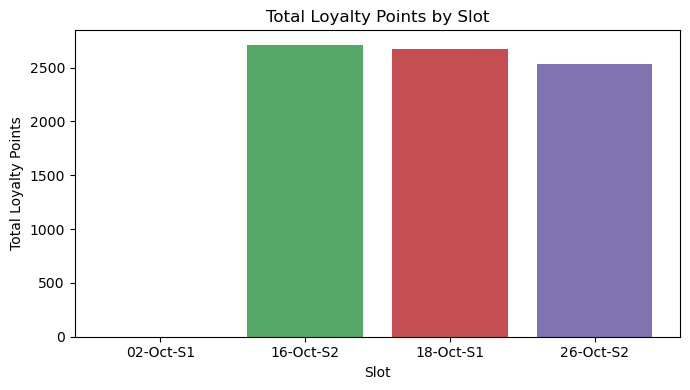

In [153]:
slots_loyalty = {
    "02‑Oct‑S1": slot_1['loyality_point'].sum(),
    "16‑Oct‑S2": slot_2['loyality_point'].sum(),
    "18‑Oct‑S1": slot_3['loyality_point'].sum(),
    "26‑Oct‑S2": slot_4['loyality_point'].sum(),
}

plt.figure(figsize=(7,4))
plt.bar(slots_loyalty.keys(), slots_loyalty.values(), color=['#4C72B0','#55A868','#C44E52','#8172B2'])
plt.title("Total Loyalty Points by Slot")
plt.ylabel("Total Loyalty Points")
plt.xlabel("Slot")
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


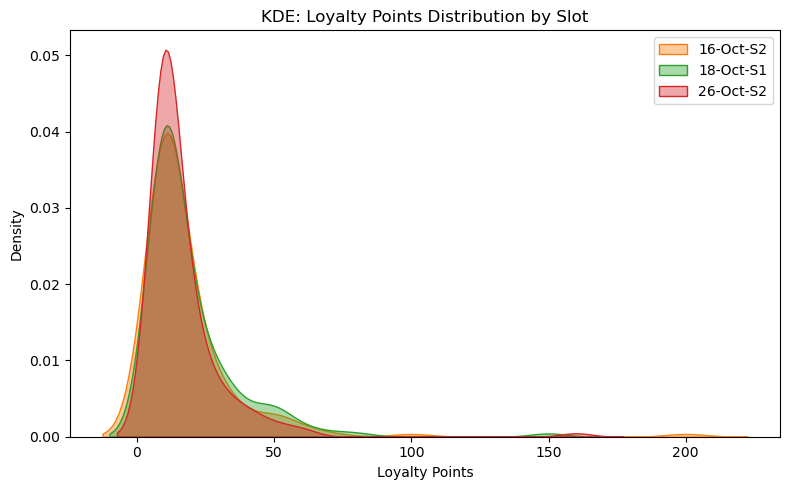

In [155]:
plt.figure(figsize=(8,5))
for df_slot, label in zip([slot_1, slot_2, slot_3, slot_4],
                          ["02‑Oct‑S1","16‑Oct‑S2","18‑Oct‑S1","26‑Oct‑S2"]):
    sns.kdeplot(df_slot['loyality_point'], label=label, fill=True, alpha=0.4)

plt.title("KDE: Loyalty Points Distribution by Slot")
plt.xlabel("Loyalty Points")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

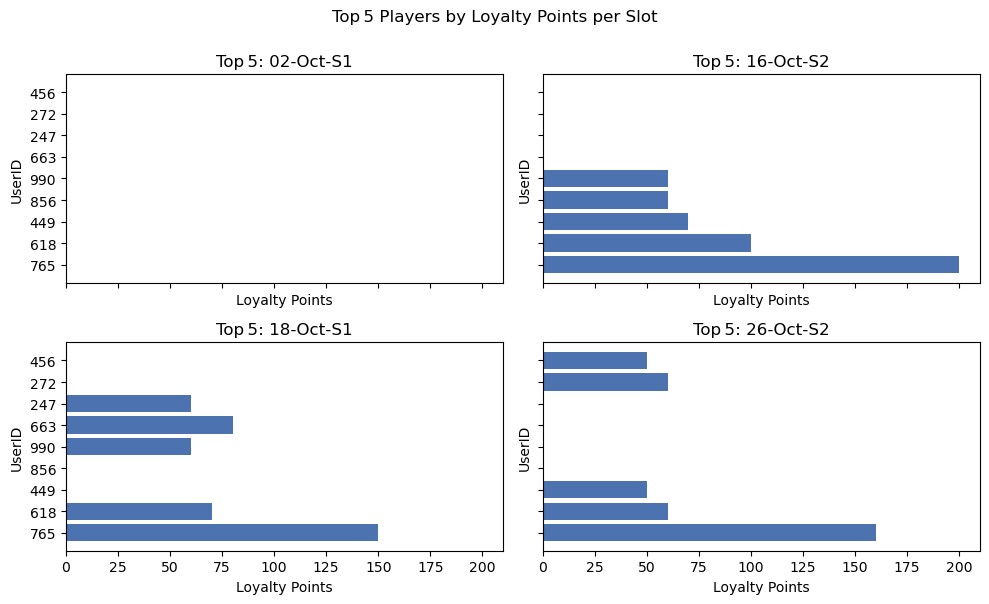

In [247]:
fig, axes = plt.subplots(2, 2, figsize=(10,6), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (df_slot, label) in zip(axes, 
    [(slot_1,"02‑Oct‑S1"), (slot_2,"16‑Oct‑S2"),
     (slot_3,"18‑Oct‑S1"), (slot_4,"26‑Oct‑S2")]):
    
    top5 = df_slot.nlargest(5, 'loyality_point')
    ax.barh(top5['UserID'].astype(str), top5['loyality_point'], color='#4C72B0')
    ax.invert_yaxis()
    ax.set_title(f"Top 5: {label}")
    ax.set_xlabel("Loyalty Points")
    ax.set_ylabel("UserID")

plt.suptitle("Top 5 Players by Loyalty Points per Slot", y=1)
plt.tight_layout()
plt.show()

In [159]:
merged_df.head()

,UserID,Total_deposite,deposite_Count,Total_withdrawal,withdrawal_Count,Total_games,Max_Diff,loyalty_point,Datetime
0,1,5000.0,1.0,0.0,0.0,2,1.0,50.401,2022-05-10 23:12:00
1,1,5000.0,1.0,0.0,0.0,2,1.0,50.401,NaT
2,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-01-10 19:34:00
3,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-02-10 07:55:00
4,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-19 04:49:00


In [164]:
merged_df=merged_df.dropna(subset=['Datetime'])

In [165]:
print(merged_df_clean['Datetime'].isna().sum())

0


In [166]:
merged_df.head()

,UserID,Total_deposite,deposite_Count,Total_withdrawal,withdrawal_Count,Total_games,Max_Diff,loyalty_point,Datetime
0,1,5000.0,1.0,0.0,0.0,2,1.0,50.401,2022-05-10 23:12:00
2,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-01-10 19:34:00
3,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-02-10 07:55:00
4,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-19 04:49:00
5,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-26 08:09:00


In [167]:
merged_df['month']=merged_df['Datetime'].dt.month


In [169]:
october_df=merged_df[merged_df['month']==10]

In [171]:
october_df.head(50)

,UserID,Total_deposite,deposite_Count,Total_withdrawal,withdrawal_Count,Total_games,Max_Diff,loyalty_point,Datetime,month
4,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-19 04:49:00,10
5,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-26 08:09:00,10
6,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-31 08:16:00,10
14,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-10 22:42:00,10
15,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-16 06:27:00,10
16,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-17 04:52:00,10
17,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-17 11:26:00,10
18,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-18 15:36:00,10
19,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-19 09:43:00,10
20,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-19 19:05:00,10


In [175]:
oct_agg=october_df.groupby('UserID').agg(
    Total_loyality_points=('loyalty_point','sum'),
    Total_Games_played=('Total_games','sum')
).reset_index()

In [176]:
oct_agg.head()

,UserID,Total_loyality_points,Total_Games_played
0,2,36066.825,18
1,5,16364.844,414
2,6,282.021,15
3,7,206.910,42
4,8,81.200,406


In [177]:
oct_agg=oct_agg.sort_values(
    by=['Total_loyality_points','Total_Games_played'],
    ascending=[False,False]
).reset_index(drop=True)
oct_agg['Rank']=oct_agg.index+1
print(oct_agg.head(10))

   UserID  Total_loyality_points  Total_Games_played  Rank
0     421            1136734.500                8025     1
1     365            1106075.425               15015     2
2     663            1077534.579               57222     3
3     989            1013407.800               19314     4
4     856             914948.760               52338     5
5     992             803187.144                8712     6
6     618             765379.368               91580     7
7     182             611266.011                7957     8
8     754             570159.915               57135     9
9     449             489112.060               53390    10


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


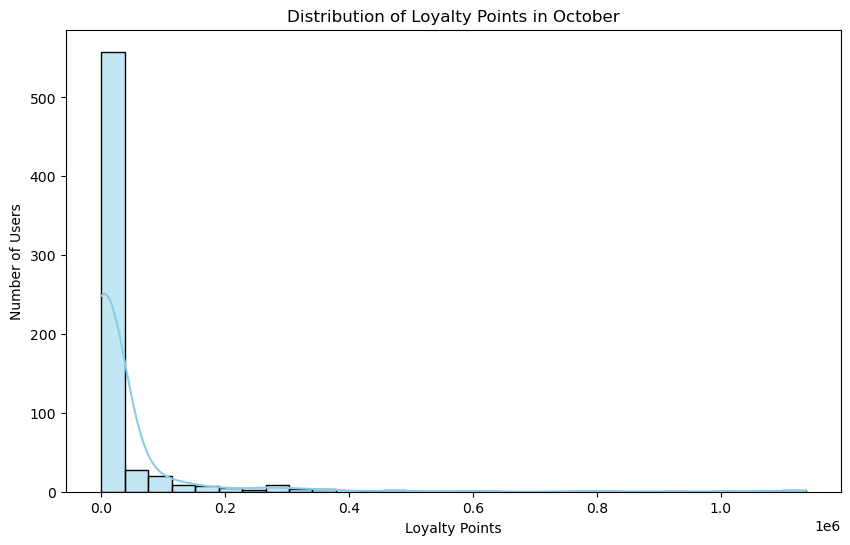

In [179]:
plt.figure(figsize=(10,6))
sns.histplot(oct_agg['Total_loyality_points'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Loyalty Points in October")
plt.xlabel("Loyalty Points")
plt.ylabel("Number of Users")
plt.show()

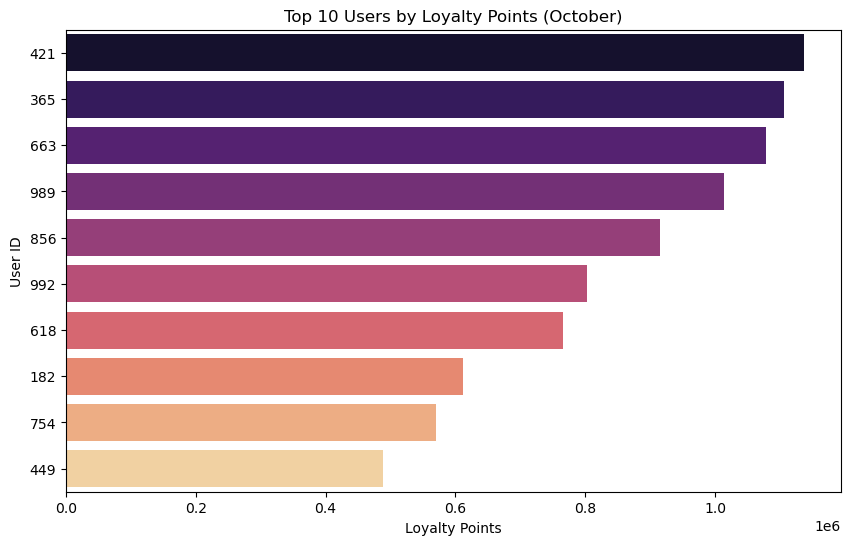

In [181]:
top10 = oct_agg.head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Total_loyality_points', y=top10['UserID'].astype(str), data=top10, palette='magma')
plt.title("Top 10 Users by Loyalty Points (October)")
plt.xlabel("Loyalty Points")
plt.ylabel("User ID")
plt.show()

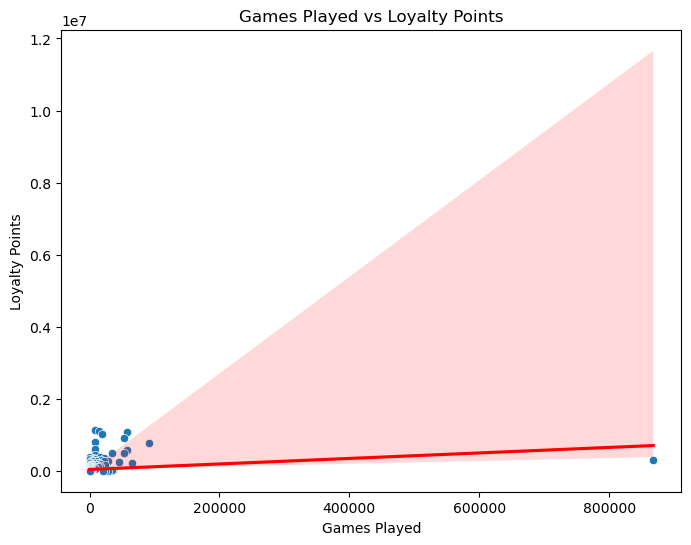

In [183]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Total_Games_played', y='Total_loyality_points', data=oct_agg)
sns.regplot(x='Total_Games_played', y='Total_loyality_points', data=oct_agg, scatter=False, color='red')
plt.title("Games Played vs Loyalty Points")
plt.xlabel("Games Played")
plt.ylabel("Loyalty Points")
plt.show()

In [189]:
avg_deposite=deposite['DepositAmount'].mean()
print(f"Average deposite amount: {avg_deposite}")

Average deposite amount: 5492.4716407638925


In [193]:
avg_deposite_user_month=deposite.groupby(['UserID','Datetime'])['DepositAmount'].sum().mean()
print(f"Average deposite amount per user per month: {avg_deposite_user_month}")

Average deposite amount per user per month: 5494.992713293936


In [197]:
gameplay.head()

,UserID,gamesplayed,Datetime,loyality_point,date
0,851,1,2022-01-10 00:03:00,10,2022-01-10
1,717,1,2022-01-10 00:03:00,10,2022-01-10
2,456,1,2022-01-10 00:06:00,10,2022-01-10
3,424,1,2022-01-10 00:07:00,10,2022-01-10
4,845,1,2022-01-10 00:09:00,10,2022-01-10


In [198]:
avg_games_per_user=gameplay.groupby('UserID')['gamesplayed'].sum().mean()
print(f"Average number of games played per user: {avg_games_per_user}")

Average number of games played per user: 24.0414364640884


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


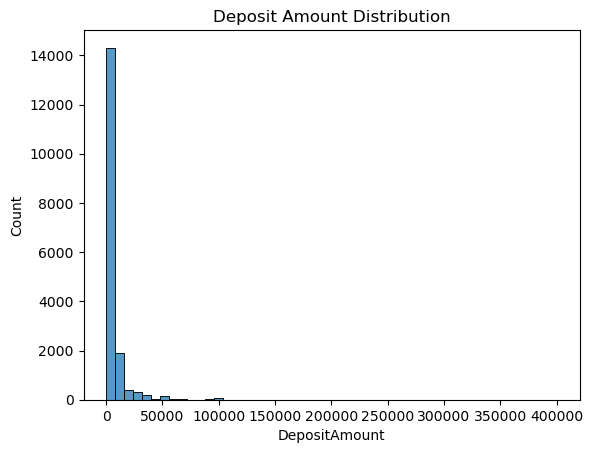

In [200]:
sns.histplot(deposite['DepositAmount'], bins=50)
plt.title("Deposit Amount Distribution")
plt.show()

In [202]:
gameplay.head()

,UserID,gamesplayed,Datetime,loyality_point,date
0,851,1,2022-01-10 00:03:00,10,2022-01-10
1,717,1,2022-01-10 00:03:00,10,2022-01-10
2,456,1,2022-01-10 00:06:00,10,2022-01-10
3,424,1,2022-01-10 00:07:00,10,2022-01-10
4,845,1,2022-01-10 00:09:00,10,2022-01-10


In [201]:
october_df.head()

,UserID,Total_deposite,deposite_Count,Total_withdrawal,withdrawal_Count,Total_games,Max_Diff,loyalty_point,Datetime,month
4,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-19 04:49:00,10
5,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-26 08:09:00,10
6,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-31 08:16:00,10
14,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-10 22:42:00,10
15,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-16 06:27:00,10


In [204]:
october_gameplay = gameplay[
    (gameplay['Datetime'].dt.month == 10) & 
    (gameplay['Datetime'].dt.year == 2022)
]
gamesplayed_october = october_gameplay.groupby('UserID')['gamesplayed'].sum().reset_index()

In [205]:
october_df = pd.merge(october_df, gamesplayed_october, on='UserID', how='left')
october_df['gamesplayed'] = october_df['gamesplayed'].fillna(0).astype(in
print(october_df.head())

   UserID  Total_deposite  deposite_Count  Total_withdrawal  withdrawal_Count  \
0       2        567000.0            20.0         1270215.0              20.0   
1       2        567000.0            20.0         1270215.0              20.0   
2       2        567000.0            20.0         1270215.0              20.0   
3       5         74100.0            67.0           32700.0               9.0   
4       5         74100.0            67.0           32700.0               9.0   

   Total_games  Max_Diff  loyalty_point            Datetime  month  \
0            6       0.0      12022.275 2022-10-19 04:49:00     10   
1            6       0.0      12022.275 2022-10-26 08:09:00     10   
2            6       0.0      12022.275 2022-10-31 08:16:00     10   
3           23      58.0        909.158 2022-10-10 22:42:00     10   
4           23      58.0        909.158 2022-10-16 06:27:00     10   

   gamesplayed  
0            3  
1            3  
2            3  
3           18  
4      

In [207]:
october_df.head()

,UserID,Total_deposite,deposite_Count,Total_withdrawal,withdrawal_Count,Total_games,Max_Diff,loyalty_point,Datetime,month,gamesplayed
0,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-19 04:49:00,10,3
1,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-26 08:09:00,10,3
2,2,567000.0,20.0,1270215.0,20.0,6,0.0,12022.275,2022-10-31 08:16:00,10,3
3,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-10 22:42:00,10,18
4,5,74100.0,67.0,32700.0,9.0,23,58.0,909.158,2022-10-16 06:27:00,10,18


In [248]:
loyalty_point_table = october_df[['UserID', 'loyalty_point', 'gamesplayed']].copy()

loyalty_point_table.head()

,UserID,loyalty_point,gamesplayed
0,2,12022.275,3
1,2,12022.275,3
2,2,12022.275,3
3,5,909.158,18
4,5,909.158,18


In [216]:
top_50 =loyalty_point_table.sort_values(by=['loyalty_point', 'gamesplayed'], ascending=[False, False]).head(50).reset_index(drop=True)

In [217]:
top_50.head()

,UserID,loyalty_point,gamesplayed
0,566,19118.355,3
1,566,19118.355,3
2,566,19118.355,3
3,421,15156.460,75
4,421,15156.460,75


In [237]:
top_50['Loyalty_Share'] = top_50['loyalty_point'] / top_50['loyalty_point'].sum()
top_50['Bonus_Amount'] = top_50['Loyalty_Share'] * 50000
top_50['Bonus_Amount'] = top_50['Bonus_Amount'].round(2)
top_50['Total_Score'] = (top_50['loyalty_point'] * 0.7) + (top_50['gamesplayed'] * 0.3)
total_score_sum = top_50['Total_Score'].sum()
top_50['Bonus_Share'] = top_50['Total_Score'] / total_score_sum

In [238]:
 top_50.head()

,UserID,loyalty_point,gamesplayed,Loyalty_Share,Bonus_Amount,Total_Score,Bonus_Share
0,566,19118.355,3,0.024838,1241.92,13383.7485,0.024791
1,566,19118.355,3,0.024838,1241.92,13383.7485,0.024791
2,566,19118.355,3,0.024838,1241.92,13383.7485,0.024791
3,421,15156.460,75,0.019691,984.56,10632.0220,0.019694
4,421,15156.460,75,0.019691,984.56,10632.0220,0.019694


In [223]:
loyalty_point_table.head()

,UserID,loyalty_point,gamesplayed
0,2,12022.275,3
1,2,12022.275,3
2,2,12022.275,3
3,5,909.158,18
4,5,909.158,18


In [224]:
loyalty_point_table['Total_Score'] = (loyalty_point_table['loyalty_point'] * 0.7) + (loyalty_point_table['gamesplayed'] * 0.3)

In [242]:
  total_row = pd.DataFrame({
    'UserID': ['Total'],
    'loyalty_point': [top_50['loyalty_point'].sum()],
    'gamesplayed': [top_50['gamesplayed'].sum()],
    'Bonus_Share': [top_50['Bonus_Share'].sum()],
    'Bonus_Amount': [top_50['Bonus_Amount'].sum()]
})
final_bonus_table = pd.concat([top_50, total_row], ignore_index=True) 
final_bonus_table.head()

,UserID,loyalty_point,gamesplayed,Loyalty_Share,Bonus_Amount,Total_Score,Bonus_Share
0,566,19118.355,3,0.024838,1241.92,13383.7485,0.024791
1,566,19118.355,3,0.024838,1241.92,13383.7485,0.024791
2,566,19118.355,3,0.024838,1241.92,13383.7485,0.024791
3,421,15156.460,75,0.019691,984.56,10632.0220,0.019694
4,421,15156.460,75,0.019691,984.56,10632.0220,0.019694


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


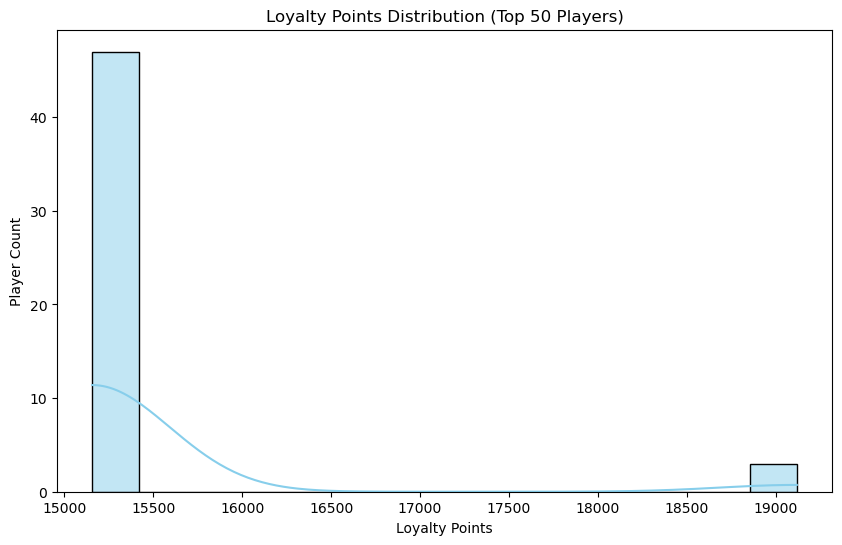

In [243]:
plt.figure(figsize=(10,6))
sns.histplot(top_50['loyalty_point'], bins=15, kde=True, color='skyblue')
plt.title('Loyalty Points Distribution (Top 50 Players)')
plt.xlabel('Loyalty Points')
plt.ylabel('Player Count')
plt.show()

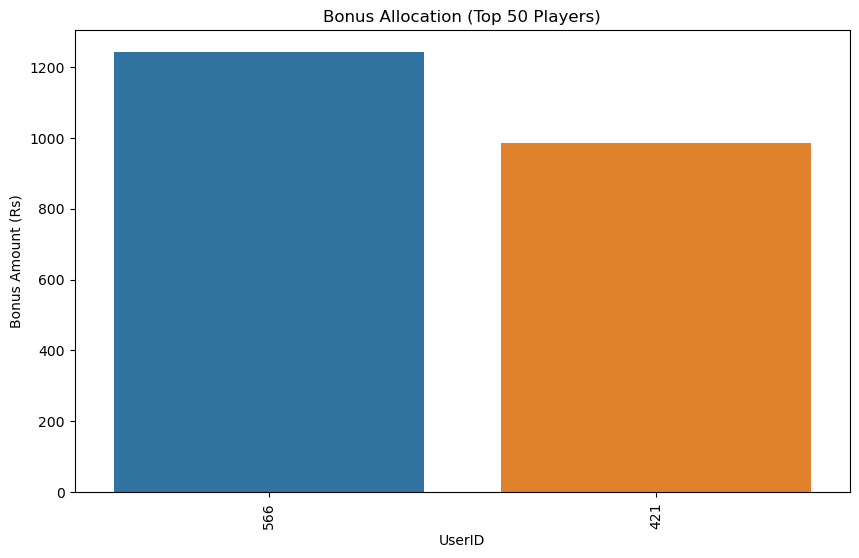

In [244]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_50['UserID'].astype(str), y=top_50['Bonus_Amount'])
plt.xticks(rotation=90)
plt.title('Bonus Allocation (Top 50 Players)')
plt.xlabel('UserID')
plt.ylabel('Bonus Amount (Rs)')
plt.show()

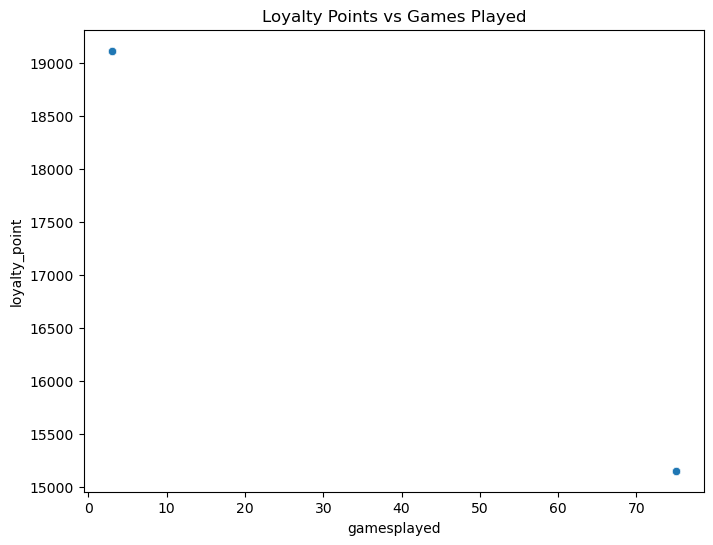

In [246]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=top_50['gamesplayed'], y=top_50['loyalty_point'])
plt.title('Loyalty Points vs Games Played')
plt.xlabel('gamesplayed')
plt.ylabel('loyalty_point')
plt.show()